# Importing Libraries

In [2]:
import pandas as pd
data = pd.read_csv(r"data.csv")

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Understanding the data

The data contains vaccination information from all around the globe. It containes information on vaccinations administered in various countries on any given day. It also containes number of vaccines available, as well as number of vaccines actuall administered.

In [3]:
data.shape

(32941, 12)

In [4]:
data.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,#country+name,#country+code,#date,#total+vaccinations,NaN,NaN,NaN,#total+vaccinations+daily,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-22,0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35.0


In [5]:
data.columns

Index(['location', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million'],
      dtype='object')

In [10]:
data.describe()

,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.849700e+04,1.549800e+04,1.634000e+04,19347.000000,18497.000000,15498.000000,32689.000000
mean,2.450309e+07,1.346483e+07,8.562366e+05,27.043115,17.640797,11.067142,3348.796415
std,1.148084e+08,5.830824e+07,3.494678e+06,33.285118,19.881071,14.869842,4477.312528
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.294190e+05,5.732350e+04,5.633000e+03,2.530000,2.100000,0.982500,392.000000
50%,8.454560e+05,4.844760e+05,3.007050e+04,12.970000,9.370000,4.640000,1820.000000
75%,4.831188e+06,2.931014e+06,1.810868e+05,40.265000,27.880000,14.937500,4985.000000
max,1.982556e+09,9.574923e+08,4.789984e+07,231.890000,116.530000,115.360000,118759.000000


In [6]:
data.isnull().sum()

location                                   0
iso_code                                   0
date                                       0
total_vaccinations                     13593
people_vaccinated                      14444
people_fully_vaccinated                17443
daily_vaccinations_raw                 16601
daily_vaccinations                       251
total_vaccinations_per_hundred         13594
people_vaccinated_per_hundred          14444
people_fully_vaccinated_per_hundred    17443
daily_vaccinations_per_million           252
dtype: int64

Creating a DataFrame to start off, we can now carefully consider vaccination information on a worldwide scale

In [7]:
df = pd.DataFrame(data)
df.drop([0],axis=0,inplace=True)
df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
1,Afghanistan,AFG,2021-02-22,0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35.0
3,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35.0
4,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35.0
5,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367,NaN,NaN,NaN,35.0


In [8]:
dlist = ["people_vaccinated", "people_fully_vaccinated", "daily_vaccinations_raw", "people_vaccinated_per_hundred", "people_fully_vaccinated_per_hundred"]
dfg = df.groupby('location')[dlist].max()
dfg.reset_index(inplace = True)
dfg

,location,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
0,Afghanistan,7.429340e+05,219159.0,4015.0,1.91,0.56
1,Africa,3.899858e+07,18389178.0,2666606.0,2.91,1.37
2,Albania,5.904760e+05,438758.0,23655.0,20.52,15.25
3,Algeria,2.500000e+06,NaN,30.0,5.70,NaN
4,Andorra,4.171600e+04,26613.0,2829.0,53.99,34.44
...,...,...,...,...,...,...
225,Wallis and Futuna,4.569000e+03,4393.0,NaN,40.63,39.06
226,World,1.982556e+09,957492276.0,47899840.0,25.43,12.28
227,Yemen,2.888280e+05,8577.0,NaN,0.97,0.03
228,Zambia,1.551290e+05,42615.0,10053.0,0.84,0.23


# Which Country Has Highest Vaccination Density

Vaccination Density is a reference to number of people vaccinated per hundred. Gibraltar, with a population of 34000 tops this list. This trend continues with Malta, Iceland, Seychelles, Cayman Islands are all low-population and surrounded by water on all sides. Countries like UAE come quite close to the top, and constitute a break in the trend, indicative of it's effective vaccination policies.

In [9]:
dfg2 = dfg.sort_values("people_fully_vaccinated_per_hundred", ascending=False).query("people_fully_vaccinated_per_hundred > 50")
dfg2

,location,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
80,Gibraltar,39259.0,38866.0,1330.0,116.53,115.36
128,Malta,372052.0,350338.0,8598.0,84.26,79.34
93,Iceland,264849.0,239686.0,21266.0,77.61,70.24
182,Seychelles,71490.0,68135.0,3758.0,72.70,69.29
38,Cayman Islands,48942.0,45504.0,1579.0,74.47,69.24
176,San Marino,22801.0,22801.0,990.0,67.18,67.18
215,United Arab Emirates,7486855.0,6527509.0,220000.0,75.70,66.00
23,Bermuda,41688.0,39034.0,NaN,66.94,62.68
16,Bahrain,1088415.0,1023415.0,81811.0,63.96,60.14
100,Israel,5732381.0,5197028.0,233542.0,66.23,60.04


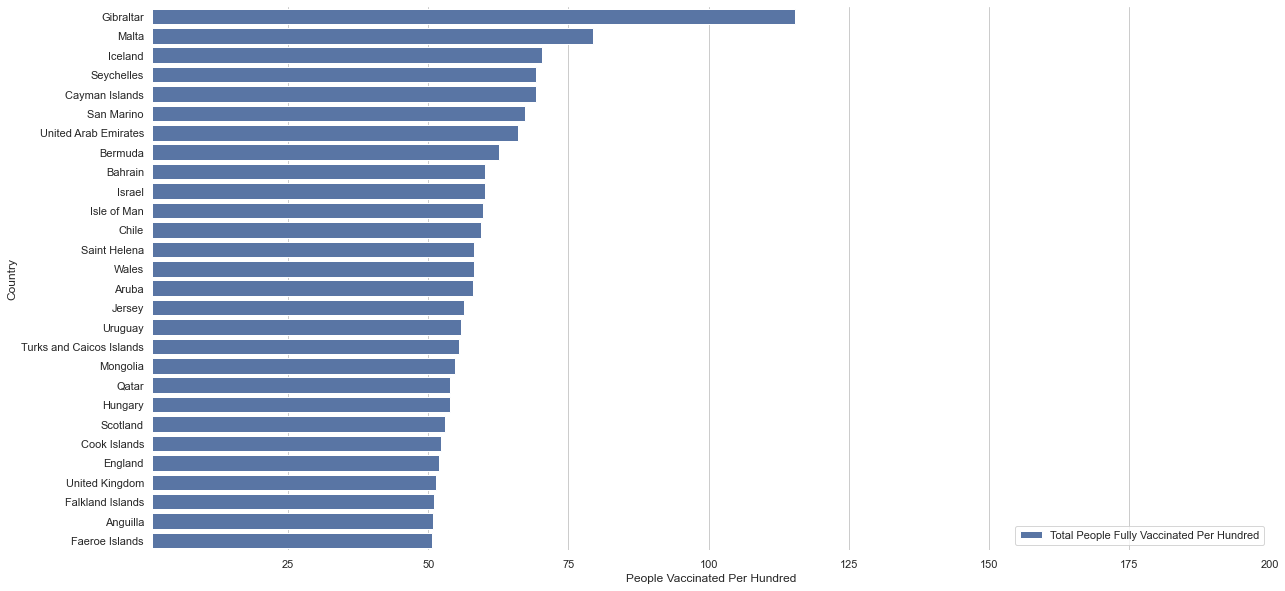

In [10]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(20, 10))


sns.barplot(y="location", x="people_fully_vaccinated_per_hundred", data=dfg2,
            label="Total People Fully Vaccinated Per Hundred", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(1, 200), ylabel="Country",
       xlabel="People Vaccinated Per Hundred")
sns.despine(left=True, bottom=True)

# Which Country Has Administered The Most Vaccines

The United Kingdom and it's member nations (England, Scotland) have put up some of the largest numbers in vaccination. Chile and UAE are also present in the rankings.

In [32]:
dfv = dfg.sort_values("people_fully_vaccinated", ascending=False).query("people_vaccinated > 3500000")
dfv['people_fully_vaccinated']=dfv['people_fully_vaccinated']/100000
dfv['people_vaccinated']=dfv['people_vaccinated']/100000
dfv.drop([226, 89, 218, 119],axis=0,inplace=True)
dfv

,location,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
11,Asia,11877.36080,4227.84758,36263152.0,25.60,9.11
67,Europe,3322.60500,2412.14096,6614439.0,44.38,32.22
42,China,6220.00000,2232.99000,24741000.0,43.21,15.51
150,North America,2622.34710,2061.68246,5136050.0,44.29,34.82
68,European Union,2414.84249,1762.01599,5820065.0,54.28,39.60
...,...,...,...,...,...,...
96,Iran,40.76904,16.41010,71691.0,4.85,1.95
195,Sri Lanka,39.91392,14.46973,222126.0,18.64,6.76
190,South Africa,38.87113,13.99497,185851.0,6.55,2.36
60,Egypt,36.05877,12.45472,97771.0,3.52,1.22


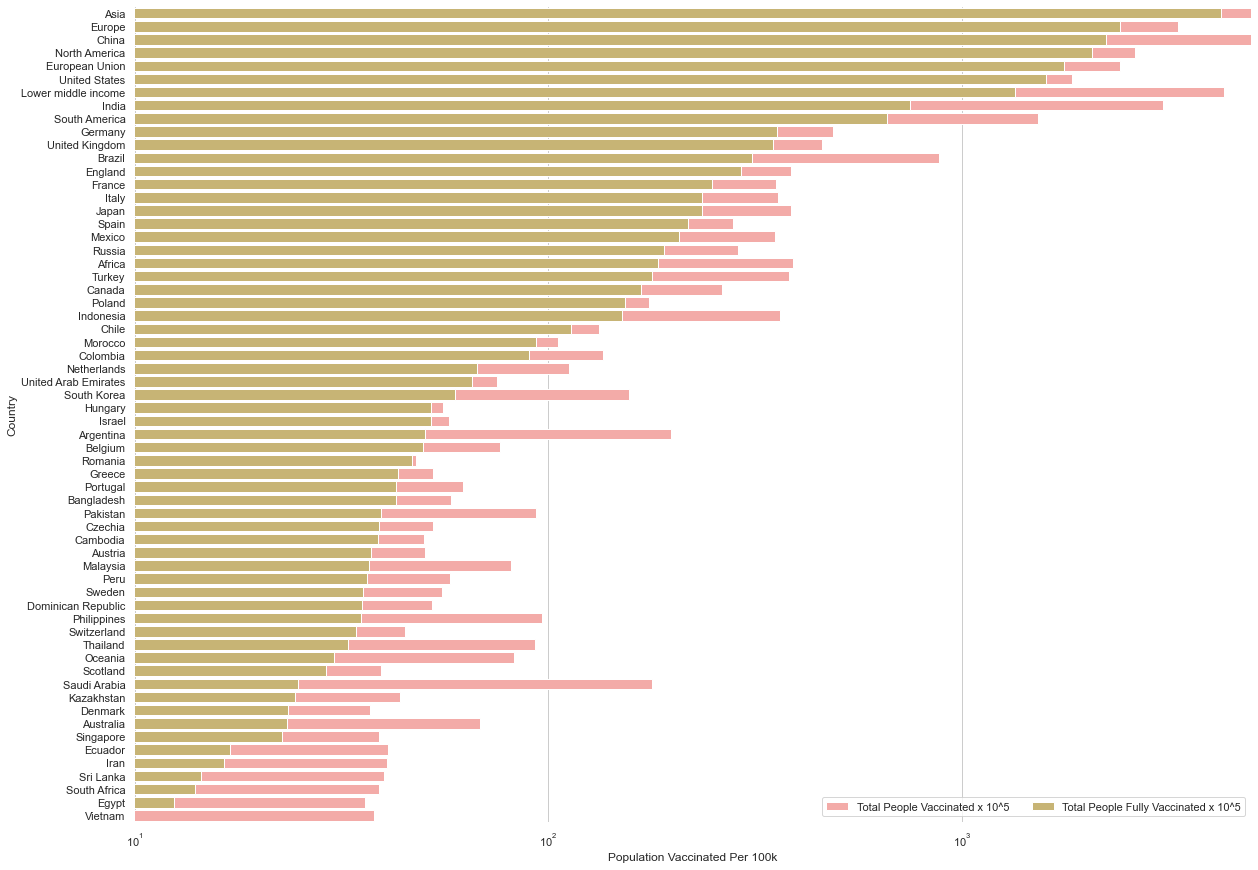

In [35]:
sns.set(style="whitegrid")

f, ax=plt.subplots(figsize=(20, 15))

sns.set_color_codes("pastel")
sns.barplot(y="location", x="people_vaccinated", data=dfv,
            label="Total People Vaccinated x 10^5", color="r").set(xscale='log')

sns.set_color_codes("muted")
sns.barplot(y="location", x="people_fully_vaccinated", data=dfv,
            label="Total People Fully Vaccinated x 10^5", color="y").set(xscale='log')

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(10, 5000), ylabel="Country",
       xlabel="Population Vaccinated Per 100k")
sns.despine(left=True, bottom=True)

# Which Country Has Highest Number of Daily Vaccinations

In [43]:
dff = df.groupby('location')["daily_vaccinations_raw"].mean()
dff = pd.DataFrame(dff)
dff.reset_index(inplace = True)
dff["daily_vaccinations_raw"]=dff["daily_vaccinations_raw"]/10000
dff.drop([226, 218, 89, 120, 150, 68],axis=0,inplace=True)
dff = dff.sort_values("daily_vaccinations_raw", ascending = False).query("daily_vaccinations_raw > 100")
dff

,location,daily_vaccinations_raw
42,China,1170.510714
11,Asia,1056.728078
67,Europe,253.781970
94,India,216.801674
217,United States,180.760694
191,South America,107.237041


At the moment, the world's most populous nation, China, vaccinates the most number of people daily.

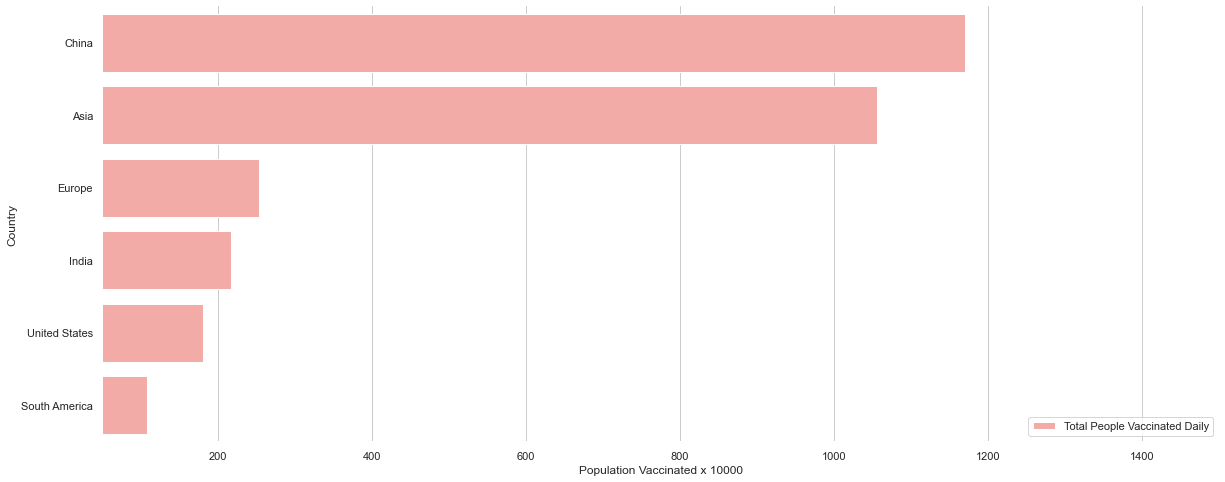

In [45]:
sns.set(style="whitegrid")

f, ax=plt.subplots(figsize=(20, 8))

sns.set_color_codes("pastel")
sns.barplot(y="location", x="daily_vaccinations_raw", data=dff,
            label="Total People Vaccinated Daily", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(50, 1500), ylabel="Country",
       xlabel="Population Vaccinated x 10000")
sns.despine(left=True, bottom=True)

# Closer Look At India's Vaccination Status

India has been slowly making steady progress towards vaccinating more of it's population gradually. Let's take a look.

In [48]:
pd.options.mode.chained_assignment = None
dfind = df.loc[df['location']=="India"]
dfind.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
13510,India,IND,2021-01-15,0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
13511,India,IND,2021-01-16,191181,191181.0,NaN,191181.0,191181,0.01,0.01,NaN,139.0
13512,India,IND,2021-01-17,224301,224301.0,NaN,33120.0,112150,0.02,0.02,NaN,81.0
13513,India,IND,2021-01-18,454049,454049.0,NaN,229748.0,151350,0.03,0.03,NaN,110.0
13514,India,IND,2021-01-19,674835,674835.0,NaN,220786.0,168709,0.05,0.05,NaN,122.0


Converting date from 'object' to datetime format

In [49]:
dfind.date = pd.to_datetime(dfind.date)
dfind.dtypes

location                                       object
iso_code                                       object
date                                   datetime64[ns]
total_vaccinations                             object
people_vaccinated                             float64
people_fully_vaccinated                       float64
daily_vaccinations_raw                        float64
daily_vaccinations                             object
total_vaccinations_per_hundred                float64
people_vaccinated_per_hundred                 float64
people_fully_vaccinated_per_hundred           float64
daily_vaccinations_per_million                float64
dtype: object

Number of People Fully Vaccinated Per Hundred in India

[Text(0, 0.5, 'Number of People Vaccinated per Hundred'), Text(0.5, 0, 'Date')]

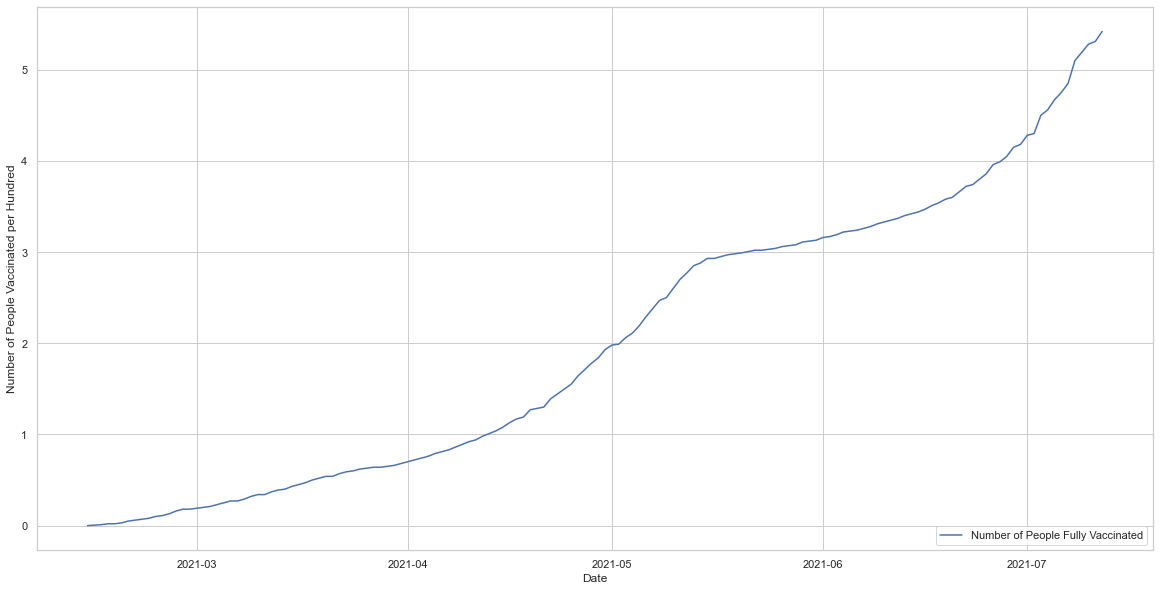

In [50]:
f, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='date', y='people_fully_vaccinated_per_hundred', data=dfind, label="Number of People Fully Vaccinated")

ax.legend(loc="lower right")
ax.set(xlabel="Date", ylabel="Number of People Vaccinated per Hundred")

As we see, more and more people are vaccinated everyday in India. Go ahead, get jabbed. It'll only lead to a safer country!

[Text(0, 0.5, 'Number of Doses'), Text(0.5, 0, 'Date')]

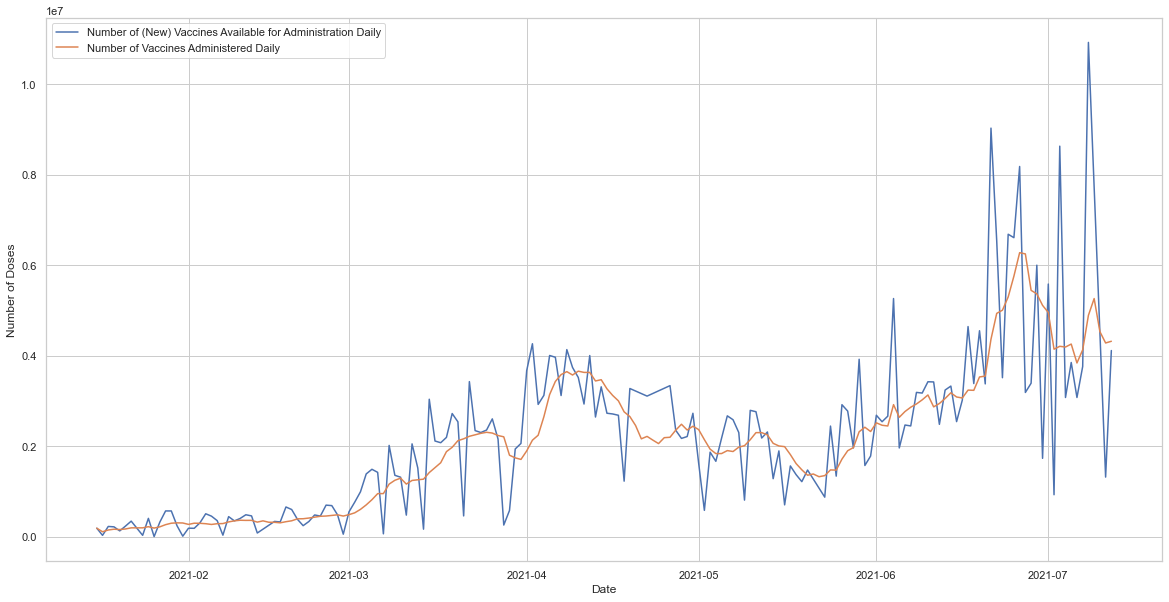

In [51]:
f, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='date', y='daily_vaccinations_raw', data=dfind, label="Number of (New) Vaccines Available for Administration Daily")
sns.lineplot(x='date', y='daily_vaccinations', data=dfind, label="Number of Vaccines Administered Daily" )

ax.set(xlabel="Date", ylabel="Number of Doses")

Vaccine availability took a hit in May, but the country was able to stabilise things and vaccinations seem to be back on track as of now.

[Text(0, 0.5, 'Number of Doses'), Text(0.5, 0, 'Date')]

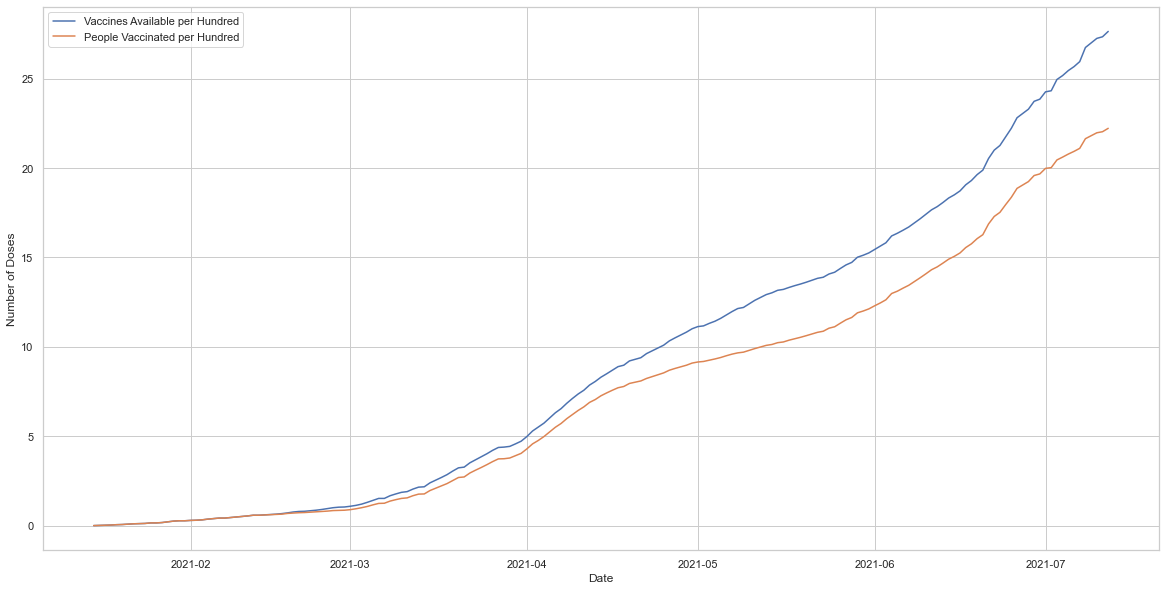

In [52]:
f, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='date', y='total_vaccinations_per_hundred', data=dfind, label="Vaccines Available per Hundred")
sns.lineplot(x='date', y='people_vaccinated_per_hundred', data=dfind, label="People Vaccinated per Hundred" )

ax.set(xlabel="Date", ylabel="Number of Doses")

Slowly, it seems we have been getting surplus in vaccine doses, indicating lack of citizens willing to get vaccinated. Or perhap vaccine production and supply lines getting more and more efficient.

Time will tell how much farther we have to go down this road, and the battle is still to be won. Let's make sure we all stay safe and happy!

[Text(0, 0.5, 'Number of Doses'), Text(0.5, 0, 'Date')]

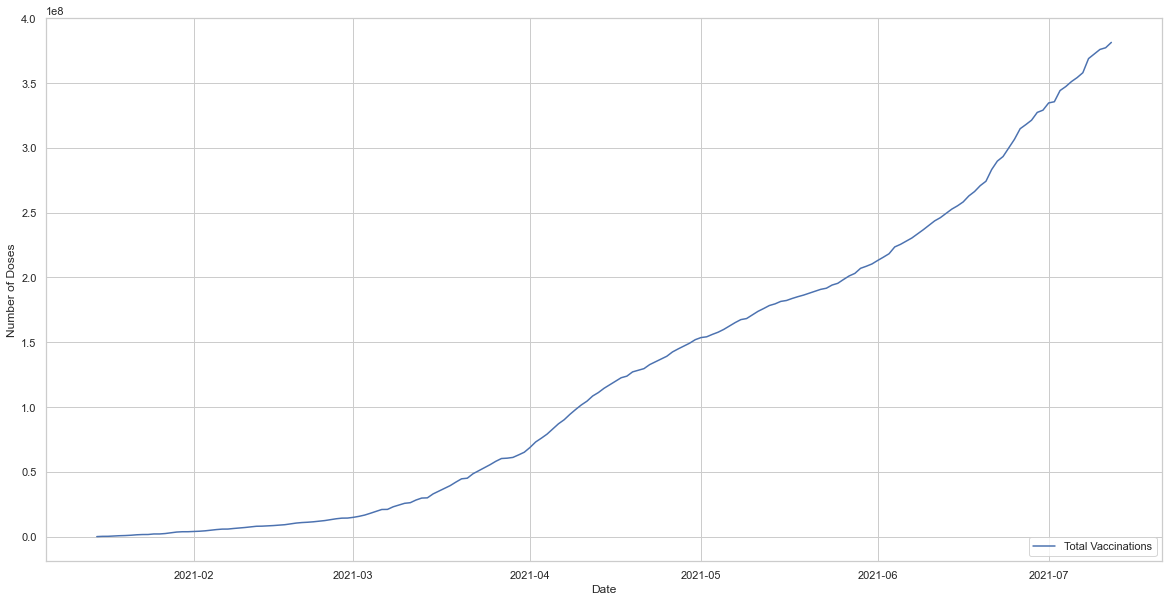

In [55]:
f, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x='date', y='total_vaccinations', data=dfind, label="Total Vaccinations" )

ax.legend(loc="lower right")
ax.set(xlabel="Date", ylabel="Number of Doses")

Thank You :)